# Libraries Import

In [1]:
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter

## df Import

In [14]:
df = pd.read_csv('Product Data.csv')

In [15]:
# Remove defects which are Deleted in order to only keep Closed defects
df = df.drop(df[df['Status'] == 'Deleted'].index)

In [16]:
df[df['Serial'].isnull()]

,Serial,Status,Date,Time,Month,Week,Week #,Employee Number,Process,Station,Table,Location,Latitude,Gore,Type,SubProcess,Condition,Criteria,Disposition


In [17]:
df

,Serial,Status,Date,Time,Month,Week,Week #,Employee Number,Process,Station,Table,Location,Latitude,Gore,Type,SubProcess,Condition,Criteria,Disposition
0,TK-778,Closed,2014-05-15,21:09:00,May 2014,20.0,3.0,103269,NaN,3,3,B13_33A,33,13,PB,GORE SEALS,CONTAMINATION,CONTAMINATION IN THE GAS SEAL THAT VIOLATES TH...,VERTROD
1,TK-778,Closed,2014-05-15,21:43:00,May 2014,20.0,3.0,103269,NaN,3,3,B16_35A,35,16,PB,GORE SEALS,CONTAMINATION,CONTAMINATION IN THE GAS SEAL THAT VIOLATES TH...,VERTROD
2,TK-778,Closed,2014-05-15,21:44:00,May 2014,20.0,3.0,103269,NaN,3,3,B16_35A,35,16,PB,GORE SEALS,CLEAR EDGE,THINNING THAT VIOLATES THE MINIMUM SEAL REQUIR...,VERTROD
3,TK-778,Closed,2014-05-15,21:54:00,May 2014,20.0,3.0,103269,NaN,3,3,B18_31A,31,18,PB,GORE FILM,GEL,GELS WITH FILM THINNING,SSA PATCH
4,TK-778,Closed,2014-05-16,02:30:00,May 2014,20.0,3.0,102533,NaN,3,3,B19_14B,-14,19,PB,GORE FILM,SCRATCH/ABRASION,IDENTIFIED ANYWHERE DURING/AFTER SEALING,SSA PATCH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11303,TK-1033,Closed,2015-05-28,12:03:00,May 2015,22.0,4.0,790,FINISHING,FINISHING TABLE,3,06_19A,19,6,PS,GORE SEALS,SEAL DEFECT,SEAL DEFECT DISCOVERED AT THE FINISHING TABLE,MRB
11304,TK-1033,Closed,2015-05-28,12:04:00,May 2015,22.0,4.0,790,FINISHING,FINISHING TABLE,3,28_07B,-7,28,PS,GORE SEALS,SEAL DEFECT,SEAL DEFECT DISCOVERED AT THE FINISHING TABLE,MRB
11305,TK-1030,Closed,2015-05-28,12:55:00,May 2015,22.0,4.0,103269,FINISHING,FINISHING TABLE,4,01_33A,33,1,PS,GORE SEALS,SEAL DEFECT,SEAL DEFECT DISCOVERED AT THE FINISHING TABLE,MRB
11306,TK-1030,Closed,2015-05-28,12:58:00,May 2015,22.0,4.0,103269,FINISHING,FINISHING TABLE,4,01_31A,31,1,PS,GORE SEALS,SEAL DEFECT,SEAL DEFECT DISCOVERED AT THE FINISHING TABLE,MRB


In [18]:
# Convert to Datetime for Date comparisons
df['Date'] = pd.to_datetime(df['Date'])

# Allows for month names to be used in order instead of alphabetical
months = ['May 2014', 'June 2014', 'July 2014', 'August 2014', 'September 2014',
     'October 2014', 'November 2014', 'December 2014', 'January 2015', 
     'February 2015', 'March 2015', 'April 2015', 'May 2015']

df['Month'] = pd.Categorical(df['Month'], categories=months, ordered=True)


## df Preview

In [19]:
# Present the top 5 values in the df
df.head()

,Serial,Status,Date,Time,Month,Week,Week #,Employee Number,Process,Station,Table,Location,Latitude,Gore,Type,SubProcess,Condition,Criteria,Disposition
0,TK-778,Closed,2014-05-15,21:09:00,May 2014,20.0,3.0,103269,NaN,3,3,B13_33A,33,13,PB,GORE SEALS,CONTAMINATION,CONTAMINATION IN THE GAS SEAL THAT VIOLATES TH...,VERTROD
1,TK-778,Closed,2014-05-15,21:43:00,May 2014,20.0,3.0,103269,NaN,3,3,B16_35A,35,16,PB,GORE SEALS,CONTAMINATION,CONTAMINATION IN THE GAS SEAL THAT VIOLATES TH...,VERTROD
2,TK-778,Closed,2014-05-15,21:44:00,May 2014,20.0,3.0,103269,NaN,3,3,B16_35A,35,16,PB,GORE SEALS,CLEAR EDGE,THINNING THAT VIOLATES THE MINIMUM SEAL REQUIR...,VERTROD
3,TK-778,Closed,2014-05-15,21:54:00,May 2014,20.0,3.0,103269,NaN,3,3,B18_31A,31,18,PB,GORE FILM,GEL,GELS WITH FILM THINNING,SSA PATCH
4,TK-778,Closed,2014-05-16,02:30:00,May 2014,20.0,3.0,102533,NaN,3,3,B19_14B,-14,19,PB,GORE FILM,SCRATCH/ABRASION,IDENTIFIED ANYWHERE DURING/AFTER SEALING,SSA PATCH


# Product Validation

## Outer Shell

In [23]:
df[(df['Serial'] == 'TK-1015') & (~df['Location'].str.startswith('B'))][['Location', 'SubProcess', 'Condition',
                                                                         'Criteria', 'Disposition', 'Employee Number']].fillna('')

,Location,SubProcess,Condition,Criteria,Disposition,Employee Number
10477,17_34A,GORE SEALS,TUCK,VERTROD ZONE; SMALL (<1/4 IN) WITH JAGGED EDGE...,VERTROD & SSA PATCH,103383
10483,44_34A,GORE SEALS,SEAL BUBBLES,VERTROD ZONE; BUBBLES WITHIN THE SEAL THAT VIO...,VERTROD,103383
10489,45_33A,GORE SEALS,TUCK,VERTROD ZONE; SMALL (<1/4 IN) WITH JAGGED EDGE...,VERTROD & SSA PATCH,103383
10490,45_31A,GORE SEALS,TUCK,VERTROD ZONE; SMALL (<1/4 IN) WITH JAGGED EDGE...,VERTROD & SSA PATCH,103383
10691,01_34A,GORE SEALS,SEAL DEFECT,SEAL DEFECT DISCOVERED AT THE FINISHING TABLE,MRB,103269
10692,09_09A,GORE SEALS,SEAL DEFECT,SEAL DEFECT DISCOVERED AT THE FINISHING TABLE,MRB,103269
10693,40_26A,GORE SEALS,SEAL DEFECT,SEAL DEFECT DISCOVERED AT THE FINISHING TABLE,MRB,103269
10694,40_25A,GORE SEALS,SEAL DEFECT,SEAL DEFECT DISCOVERED AT THE FINISHING TABLE,MRB,103269


## Inner Shell

In [24]:
df[(df['Serial'] == 'TK-1015') & (df['Location'].str.startswith('B'))][['Location', 'SubProcess', 'Condition',
                                                                        'Criteria', 'Disposition', 'Employee Number']].fillna('')

,Location,SubProcess,Condition,Criteria,Disposition,Employee Number
10422,B05_37A,GORE SEALS,TUCK,VERTROD ZONE; SMALL (<1/4 IN) NO JAGGED EDGE SEAL,SSA PATCH,103383
10430,B13_32A,GORE SEALS,TUCK,VERTROD ZONE; SMALL (<1/4 IN) NO JAGGED EDGE SEAL,SSA PATCH,103383
10431,B14_32A,GORE SEALS,TUCK,VERTROD ZONE; SMALL (<1/4 IN) NO JAGGED EDGE SEAL,SSA PATCH,103383
10432,B15_30B,GORE SEALS,TUCK,VERTROD ZONE; SMALL (<1/4 IN) NO JAGGED EDGE SEAL,SSA PATCH,103847
10435,B25_34B,GORE SEALS,TUCK,VERTROD ZONE; SMALL (<1/4 IN) NO JAGGED EDGE SEAL,SSA PATCH,103383
10438,B31_36A,GORE SEALS,TUCK,LARGE (>1/4 IN),INCISION & RESEAL,103383
10442,B31_28B,GORE SEALS,TUCK,VERTROD ZONE; SMALL (<1/4 IN) WITH JAGGED EDGE...,VERTROD & SSA PATCH,103847
10443,B31_34B,GORE SEALS,TUCK,VERTROD ZONE; SMALL (<1/4 IN) WITH JAGGED EDGE...,VERTROD & SSA PATCH,103847
10444,B31_33A,GORE SEALS,TUCK,VERTROD ZONE; SMALL (<1/4 IN) NO JAGGED EDGE SEAL,SSA PATCH,103847
10445,B31_35B,GORE SEALS,TUCK,VERTROD ZONE; SMALL (<1/4 IN) NO JAGGED EDGE SEAL,SSA PATCH,103847


# Date Selection

In [0]:
df = df[(df['Date'] >= datetime.datetime(2015, 1, 1)) & (df['Date'] <= datetime.datetime(2015, 3, 31))]

## Unique Values per Column

In [25]:
# Present the unique values of the 'Serial' column i.e. the values that appear at least once
df['Serial'].unique()

array(['TK-778', 'TK-779', 'TK-780', 'TK-781', 'TK-782', 'TK-783',
       'TK-784', 'TK-785', 'TK-786', 'TK-788', 'TK-789', 'TK-790',
       'TK-791', 'TK-792', 'TK-793', 'TK-794', 'TK-795', 'TK-796',
       'TK-797', 'TK-799', 'TK-798', 'TK-800', 'TK-801', 'TK-802',
       'TK-804', 'TK-805', 'TK-806', 'TK-807', 'TK-808', 'TK-809',
       'TK-810', 'TK-811', 'TK-812', 'TK-813', 'TK-814', 'TK-815',
       'TK-819', 'TK-838', 'TK-837', 'TK-836', 'TK-835', 'TK-833',
       'TK-832', 'TK-831', 'TK-828', 'TK-827', 'TK-826', 'TK-825',
       'TK-824', 'TK-823', 'TK-822', 'TK-821', 'TK-820', 'TK-818',
       'TK-817', 'TK-816', 'TK-803', 'TK-829', 'TK-839', 'TK-840',
       'TK-830', 'TK-842', 'TK-841', 'TK-843', 'TK-834', 'TK-844',
       'TK-847', 'TK-845', 'TK-846', 'TK-848', 'TK-849', 'TK-850',
       'TK-851', 'TK-852', 'TK-853', 'TK-854', 'TK-855', 'TK-856',
       'TK-857', 'TK-858', 'TK-859', 'TK-860', 'TK-861', 'TK-862',
       'TK-863', 'TK-867', 'TK-865', 'TK-864', 'TK-866', 'TK-8

## Products Built

In [27]:
df['Serial'].nunique()

453

### Warlock

In [28]:
df[df['Serial'].str.startswith('W')]['Serial'].nunique()

199

### Tokens

In [29]:
df[df['Serial'].str.startswith('T')]['Serial'].nunique()

254

## Is Specific Product Present

In [30]:
'TK-1015' in df['Serial'].values

True

## Specific Defects

In [31]:
# Present 'TUNNEL (VOID)' defects
df[df['Condition'] == 'TUNNEL (VOID)']

,Serial,Status,Date,Time,Month,Week,Week #,Employee Number,Process,Station,Table,Location,Latitude,Gore,Type,SubProcess,Condition,Criteria,Disposition
4536,WK-027,Closed,2014-11-04,10:04:00,November 2014,45.0,1.0,101095,"32"" SEAL-ON APEX",FINISHING TABLE,5,40_36A,36,40,QS,DONUT SEAL,TUNNEL (VOID),CHANGE IN SEAL APPEARANCE RUNNING ACROSS THE W...,FILM FILLER & RESEAL
4569,WK-028,Closed,2014-10-30,09:38:00,October 2014,44.0,5.0,101095,"32"" SEAL-ON APEX",FINISHING TABLE,6,34_41A,41,34,QS,DONUT SEAL,TUNNEL (VOID),CHANGE IN SEAL APPEARANCE RUNNING ACROSS THE W...,FILM FILLER & RESEAL
5988,WK-060,Closed,2014-12-24,14:30:00,December 2014,52.0,4.0,102025,FINISHING,FINISHING TABLE,5,14_38A,38,14,QS,DONUT SEAL,TUNNEL (VOID),CHANGE IN SEAL APPEARANCE RUNNING ACROSS THE W...,FILM FILLER & RESEAL
5989,WK-058,Closed,2014-12-30,09:34:00,December 2014,1.0,5.0,103129,FINISHING,FINISHING TABLE,2,15_43A,43,15,QS,DONUT SEAL,TUNNEL (VOID),CHANGE IN SEAL APPEARANCE RUNNING ACROSS THE W...,FILM FILLER & RESEAL
6512,TK-998,Closed,2015-01-08,13:01:00,January 2015,2.0,2.0,103129,FINISHING,FINISHING TABLE,4,15_36A,36,15,PS,DONUT SEAL,TUNNEL (VOID),CHANGE IN SEAL APPEARANCE RUNNING ACROSS THE W...,FILM FILLER & RESEAL
6595,WK-072,Closed,2015-01-10,13:01:00,January 2015,2.0,2.0,103129,FINISHING,FINISHING TABLE,2,14_43A,43,14,QS,DONUT SEAL,TUNNEL (VOID),CHANGE IN SEAL APPEARANCE RUNNING ACROSS THE W...,FILM FILLER & RESEAL
6596,WK-072,Closed,2015-01-10,13:02:00,January 2015,2.0,2.0,103129,FINISHING,FINISHING TABLE,2,57_43A,43,57,QS,DONUT SEAL,TUNNEL (VOID),CHANGE IN SEAL APPEARANCE RUNNING ACROSS THE W...,FILM FILLER & RESEAL
6597,WK-072,Closed,2015-01-10,13:02:00,January 2015,2.0,2.0,103129,FINISHING,FINISHING TABLE,2,50_43A,43,50,QS,DONUT SEAL,TUNNEL (VOID),CHANGE IN SEAL APPEARANCE RUNNING ACROSS THE W...,FILM FILLER & RESEAL
6791,WK-077,Closed,2015-01-16,06:32:00,January 2015,3.0,3.0,103129,FINISHING,FINISHING TABLE,2,25_43A,43,25,QS,DONUT SEAL,TUNNEL (VOID),CHANGE IN SEAL APPEARANCE RUNNING ACROSS THE W...,FILM FILLER & RESEAL
6892,WK-080,Closed,2015-01-21,09:26:00,January 2015,4.0,3.0,103129,FINISHING,FINISHING TABLE,6,25_43A,43,25,QS,DONUT SEAL,TUNNEL (VOID),CHANGE IN SEAL APPEARANCE RUNNING ACROSS THE W...,FILM FILLER & RESEAL


## Specific Defect by Product

In [33]:
# Specific Defect count per product that has such defect. i.e. Which products have HOLE IN SEAL and how many HOLE IN SEAL each one has
df[df['Condition'] == 'HOLE IN SEAL']['Serial'].value_counts()

WK-160    4
WK-007    4
TK-944    3
WK-112    3
WK-122    2
WK-143    2
WK-049    2
WK-103    2
TK-896    2
TK-953    2
WK-120    2
TK-913    1
TK-975    1
WK-188    1
WK-039    1
WK-013    1
WK-037    1
WK-108    1
WK-027    1
TK-912    1
WK-090    1
TK-934    1
WK-198    1
WK-026    1
WK-028    1
TK-947    1
TK-985    1
WK-196    1
TK-970    1
WK-054    1
TK-897    1
TK-895    1
WK-024    1
TK-981    1
TK-984    1
Name: Serial, dtype: int64

In [34]:
# Find Products with Hole, return Serial and Location
df[df['Condition'] == 'HOLE IN SEAL'][['Serial', 'Location']]

,Serial,Location
2196,WK-007,B56_41A
2197,WK-007,B56_43A
2198,WK-007,B55_44B
2199,WK-007,47_33A
2295,TK-896,B15_01B
2299,TK-896,B25_36A
2303,TK-895,B47_36B
2308,TK-897,B13_31A
2663,TK-912,B05_34B
2671,TK-913,B39_23A


## Specific Defect by Month by Product

In [35]:
# Same as above but by month
df[df['Condition'] == 'HOLE'].groupby('Month')['Serial'].count()

Month
May 2014           0
June 2014          4
July 2014          4
August 2014        4
September 2014     5
October 2014       7
November 2014      4
December 2014      0
January 2015      14
February 2015      7
March 2015         2
April 2015         7
May 2015           3
Name: Serial, dtype: int64

## Slicing df

In [36]:
# Specific Rows and Columns
# Row 3 and 5, Table and Location columns
df.loc[[3,6]][['Table', 'Location']]

,Table,Location
3,3,B18_31A
6,3,B21_14B


In [37]:
# From row to row, column to colum
# Row 3 to 6, from Table to Disposition column
df.loc[3:6, 'Table':'Disposition']

,Table,Location,Latitude,Gore,Type,SubProcess,Condition,Criteria,Disposition
3,3,B18_31A,31,18,PB,GORE FILM,GEL,GELS WITH FILM THINNING,SSA PATCH
4,3,B19_14B,-14,19,PB,GORE FILM,SCRATCH/ABRASION,IDENTIFIED ANYWHERE DURING/AFTER SEALING,SSA PATCH
5,3,B20_14B,-14,20,PB,GORE FILM,SCRATCH/ABRASION,IDENTIFIED ANYWHERE DURING/AFTER SEALING,SSA PATCH
6,3,B21_14B,-14,21,PB,GORE FILM,SCRATCH/ABRASION,IDENTIFIED ANYWHERE DURING/AFTER SEALING,SSA PATCH


In [38]:
df.loc[df['Serial'] == 'TK-985']

,Serial,Status,Date,Time,Month,Week,Week #,Employee Number,Process,Station,Table,Location,Latitude,Gore,Type,SubProcess,Condition,Criteria,Disposition
5499,TK-985,Closed,2014-12-09,08:23:00,December 2014,50.0,2.0,103760,SEAL BALLONET,SEALING TABLE 4,4,B01_22B,-22,1,PB,GORE SEALS,CONTAMINATION,NO VERTROD ZONE; CONTAMINATION THAT VIOLATES T...,RESEAL
5500,TK-985,Closed,2014-12-09,09:34:00,December 2014,50.0,2.0,103760,SEAL BALLONET,SEALING TABLE 4,4,B07_34B,-34,7,PB,GORE SEALS,CONTAMINATION,CONTAMINATION THAT VIOLATES THE MINIMUM SEAL R...,VERTROD
5501,TK-985,Closed,2014-12-09,10:21:00,December 2014,50.0,2.0,103888,SEAL BALLONET,SEALING TABLE 4,4,B11_32A,32,11,PB,GORE SEALS,TUCK,LARGE (>1/4 IN),INCISION & RESEAL
5502,TK-985,Closed,2014-12-09,10:36:00,December 2014,50.0,2.0,103888,SEAL BALLONET,SEALING TABLE 4,4,B11_33A,33,11,PB,GORE SEALS,FAILED RESEAL,DEFECT PERSISTS AFTER RESEAL OR SUBSEQUENT SEA...,CUT OFF
5503,TK-985,Closed,2014-12-09,11:49:00,December 2014,50.0,2.0,103888,SEAL BALLONET,SEALING TABLE 4,4,B10_22A,22,10,PB,GORE SEALS,FAILED RESEAL,RESEAL ATTEMPT FAILED,CUT OFF
5518,TK-985,Closed,2014-12-09,14:15:00,December 2014,50.0,2.0,103888,SEAL BALLONET,SEALING TABLE 4,4,B15_32A,32,15,PB,GORE SEALS,INCOMPLETE SEAL,SEALING PROCESS WAS INTERRUPTED; NOTE THE ISSU...,RESEAL
5527,TK-985,Closed,2014-12-09,19:29:00,December 2014,50.0,2.0,103216,SEAL BALLONET,SEALING TABLE 4,4,B46_02A,2,46,PB,GORE SEALS,CONTAMINATION,NO VERTROD ZONE; CONTAMINATION THAT VIOLATES T...,RESEAL
5528,TK-985,Closed,2014-12-09,20:02:00,December 2014,50.0,2.0,103216,SEAL BALLONET,SEALING TABLE 4,4,B48_32B,-32,48,PB,GORE SEALS,CONTAMINATION,CONTAMINATION THAT VIOLATES THE MINIMUM SEAL R...,VERTROD
5529,TK-985,Closed,2014-12-09,20:02:00,December 2014,50.0,2.0,103216,SEAL BALLONET,SEALING TABLE 4,4,B48_32B,-32,48,PB,GORE SEALS,CONTAMINATION,CONTAMINATION THAT VIOLATES THE MINIMUM SEAL R...,VERTROD
5530,TK-985,Closed,2014-12-09,20:04:00,December 2014,50.0,2.0,103216,SEAL BALLONET,SEALING TABLE 4,4,B48_36B,-36,48,PB,GORE SEALS,CONTAMINATION,CONTAMINATION THAT VIOLATES THE MINIMUM SEAL R...,VERTROD


In [39]:
df.filter(items=['Serial', 'Table', 'Location'])

,Serial,Table,Location
0,TK-778,3,B13_33A
1,TK-778,3,B16_35A
2,TK-778,3,B16_35A
3,TK-778,3,B18_31A
4,TK-778,3,B19_14B
...,...,...,...
11303,TK-1033,3,06_19A
11304,TK-1033,3,28_07B
11305,TK-1030,4,01_33A
11306,TK-1030,4,01_31A


# Defect Specifics

## Defect count by Month

In [40]:
df[df['Condition'] == 'HOLE IN SEAL'].groupby('Month')['Table'].count()

Month
May 2014           0
June 2014          0
July 2014          0
August 2014       10
September 2014     6
October 2014       6
November 2014      5
December 2014      5
January 2015       1
February 2015     10
March 2015         6
April 2015         1
May 2015           2
Name: Table, dtype: int64

## Defect per Month

In [41]:
df[df['Condition'] == 'TUCK'].groupby('Month').size().reset_index(name='Tucks')

,Month,Tucks
0,May 2014,177
1,June 2014,354
2,July 2014,186
3,August 2014,212
4,September 2014,182
5,October 2014,237
6,November 2014,306
7,December 2014,320
8,January 2015,298
9,February 2015,357


## Top 10 Defects All df

In [42]:
df['Condition'].value_counts().head(10)

CONTAMINATION         3783
TUCK                  3383
JAGGED EDGE            856
FAILED RESEAL          552
SEAL DEFECT            301
VOID CTAPE/BACKING     190
INCOMPLETE SEAL        179
DAMAGE                 163
FAILED REPAIR          156
SEAL BUBBLES           154
Name: Condition, dtype: int64

## Defects spanning multiple criterias

In [43]:
df[(df['SubProcess'] == 'GORE SEALS') & (df['Criteria'] == 'SUDDEN CHANGE IN OVERALL FEEL OR APPEARANCE')]

,Serial,Status,Date,Time,Month,Week,Week #,Employee Number,Process,Station,Table,Location,Latitude,Gore,Type,SubProcess,Condition,Criteria,Disposition
100,TK-781,Closed,2014-05-20,08:42:00,May 2014,21.0,3.0,102526,NaN,3,3,B47_36A,36,47,PB,GORE SEALS,OTHER,SUDDEN CHANGE IN OVERALL FEEL OR APPEARANCE,MRB
106,TK-781,Closed,2014-05-21,02:26:00,May 2014,21.0,3.0,102526,NaN,3,3,47_37B,-37,47,PS,GORE SEALS,OTHER,SUDDEN CHANGE IN OVERALL FEEL OR APPEARANCE,MRB
2951,TK-927,Closed,2014-09-09,08:23:00,September 2014,37.0,2.0,101095,SEALING,SEALING TABLE 1,1,B02_ALL,0,2,PB,GORE SEALS,ABNORMALITY,SUDDEN CHANGE IN OVERALL FEEL OR APPEARANCE,MRB
5665,TK-987,Closed,2014-12-13,15:43:00,December 2014,50.0,2.0,101095,SEAL BALLONET,SEALING TABLE 4,4,B33_31A,31,33,PB,GORE SEALS,ABNORMALITY,SUDDEN CHANGE IN OVERALL FEEL OR APPEARANCE,MRB
6177,WK-063,Closed,2014-12-30,08:28:00,December 2014,1.0,5.0,101095,SEAL SHELL GORES,SEALING TABLE 5,5,36_08B,-8,36,QS,GORE SEALS,ABNORMALITY,SUDDEN CHANGE IN OVERALL FEEL OR APPEARANCE,MRB


## Defect by location

In [44]:
# All rows from df with contamination in the condition,
# grab the locations column, grab the first 3 digits of the string
# present the values, present top 10
df[df['Condition'] == "CONTAMINATION"]['Location'].str[-3:].value_counts().head(10)

42A    212
36A    203
41A    190
35A    143
34A    104
40A    104
36B    102
42B     86
ALL     84
37A     84
Name: Location, dtype: int64

## Most Common Location (Latitude)

In [45]:
# ALL counts as 0
df['Latitude'].mode()

0    0
dtype: int64

## Defects by latitude range

In [46]:
# Find Tokyos with Vertrods below the 22 Latitude, return Serial and Location
df[(df['Serial'].str.startswith('T')) & (df['Disposition'] == 'VERTROD') & (df['Latitude'] < 22)][['Serial', 'Location']]

,Serial,Location
20,TK-779,B01_21B
37,TK-779,B45_04B
40,TK-779,B48_35B
41,TK-779,B48_36B
42,TK-779,B48_21A
...,...,...
10714,TK-1019,B42_29B
10960,TK-1023,B41_32B
11050,TK-1025,B08_34B
11179,TK-1029,12_36B


In [47]:
# Find stragglers Products with non-standard Location notation
df[(df['Latitude'] > 64) & (df['Disposition'] == 'VERTROD')][['Serial', 'Location']]

,Serial,Location


## Different Defects by Month

In [51]:
contamination = df[df['Condition'] == 'CONTAMINATION'].groupby('Month').count()['Serial']
tuck = df[df['Condition'] == 'TUCK'].groupby('Month').count()['Serial']
jagged_edge = df[df['Condition'] == 'JAGGED EDGE'].groupby('Month').count()['Serial']

defects = pd.DataFrame(columns=['Contamination', 'Tuck', 'Jagged Edge'])

defects['Contamination'] = contamination
defects['Tuck'] = tuck
defects['Jagged Edge'] = jagged_edge

defects # defects.plot() for chart 

,Contamination,Tuck,Jagged Edge
Month,,,
May 2014,93,177,65
June 2014,137,354,80
July 2014,215,186,98
August 2014,254,212,47
September 2014,407,182,72
October 2014,338,237,74
November 2014,163,306,90
December 2014,262,320,117
January 2015,383,298,77


## Different Defects by Table

In [52]:
contamination = df[df['Condition'] == 'CONTAMINATION'].groupby('Table').count()['Serial']
tuck = df[df['Condition'] == 'TUCK'].groupby('Table').count()['Serial']
jagged_edge = df[df['Condition'] == 'JAGGED EDGE'].groupby('Table').count()['Serial']

defects = pd.DataFrame(columns=['Contamination', 'Tuck', 'Jagged Edge'])

defects['Contamination'] = contamination
defects['Tuck'] = tuck
defects['Jagged Edge'] = jagged_edge

defects # defects.plot() for chart

,Contamination,Tuck,Jagged Edge
Table,,,
1,379,713,113
2,720,727,236
3,416,479,59
4,549,352,77
5,971,627,84
6,748,485,287


# Overall Trends

## Reworks

### Specific Rework Over Time (Comprehensive Table)

In [53]:
disposition = 'RESEAL'

rework = df[df['Disposition'] == disposition].groupby('Month').count()['Serial'] # Gives the count of reworks per month
affected = df[df['Disposition'] == disposition].groupby('Month').nunique()['Serial']
Products_month = df.groupby('Month')['Serial'].nunique() # Count of Products per Month


table = pd.DataFrame(columns=['Rework', 'Products Built', 'Products Affected',
                              '% Affected', 'Defects per Affected',]) # Create dfframe with the mentioned 3 columns 

table['Rework'] = rework # Defect column
table['Products Built'] = Products_month # Products Built column
table['Products Affected'] = affected # Percentage column by diving one column by another
table['% Affected'] = table['Products Affected'] / table['Products Built']
table['Defects per Affected'] = table['Rework'] / table['Products Affected']


table # Present plot

,Rework,Products Built,Products Affected,% Affected,Defects per Affected
Month,,,,,
May 2014,67,25,22,0.880000,3.045455
June 2014,159,40,34,0.850000,4.676471
July 2014,239,47,45,0.957447,5.311111
August 2014,214,43,40,0.930233,5.350000
September 2014,271,44,42,0.954545,6.452381
October 2014,213,34,29,0.852941,7.344828
November 2014,134,38,33,0.868421,4.060606
December 2014,178,42,37,0.880952,4.810811
January 2015,231,43,38,0.883721,6.078947


### Percentage by Quadrant

In [57]:
disposition = 'RESEAL'

warlock_outer = df[(df['Disposition'] == disposition) & (df['Type'] == 'QS')]['Serial'].nunique() # Gives the count of reworks
warlock_inner = df[(df['Disposition'] == disposition) & (df['Type'] == 'QB')]['Serial'].nunique() 
tokyo_outer = df[(df['Disposition'] == disposition) & (df['Type'] == 'PS')]['Serial'].nunique() 
tokyo_inner = df[(df['Disposition'] == disposition) & (df['Type'] == 'PB')]['Serial'].nunique()

warlocks = df[df['Serial'].str.startswith('W')]['Serial'].nunique() # Products from that type
tokyos = df[df['Serial'].str.startswith('T')]['Serial'].nunique()


print(f'QS {disposition}: {warlock_outer / warlocks}')
print(f'PS {disposition}: {warlock_inner / warlocks}')
print(f'QB {disposition}: {tokyo_outer / tokyos}')
print(f'PB {disposition}: {tokyo_inner / tokyos}')

QS RESEAL: 0.9447236180904522
PS RESEAL: 0.8693467336683417
QB RESEAL: 0.8110236220472441
PB RESEAL: 0.6692913385826772


### Multiple Reworks Over Time (Comprehensive Table)

In [59]:
reworks = ['VERTROD STEP', 'VERTROD POSITION', 'CURVED VERTROD']


defect = df[(df['Condition'].isin(reworks))].groupby('Month').count()['Serial'] # Gives the count of reworks per month
affected = df[(df['Condition'].isin(reworks))].groupby('Month').nunique()['Serial']
Products_month = df.groupby('Month')['Serial'].nunique() # Count of Products per Month


table = pd.DataFrame(columns=['Rework', 'Products Built', 'Products Affected',
                              '% Affected', 'Defects per Affected',]) # Create dfframe with the mentioned 3 columns 

table['Rework'] = defect # Defect column
table['Products Built'] = Products_month # Products Built column
table['Products Affected'] = affected # Percentage column by diving one column by another
table['% Affected'] = table['Products Affected'] / table['Products Built']
table['Defects per Affected'] = table['Rework'] / table['Products Affected']


table # Present plot

,Rework,Products Built,Products Affected,% Affected,Defects per Affected
Month,,,,,
May 2014,1,25,1,0.040000,1.000000
June 2014,5,40,5,0.125000,1.000000
July 2014,5,47,5,0.106383,1.000000
August 2014,1,43,1,0.023256,1.000000
September 2014,2,44,2,0.045455,1.000000
October 2014,5,34,4,0.117647,1.250000
November 2014,2,38,2,0.052632,1.000000
December 2014,6,42,4,0.095238,1.500000
January 2015,3,43,3,0.069767,1.000000


### Percentage by Quadrant

In [60]:
reworks = ['VERTROD STEP', 'VERTROD POSITION', 'CURVED VERTROD']

warlock_outer = df[(df['Condition'].isin(reworks)) & (df['Type'] == 'QS')]['Serial'].nunique() # Gives the count of reworks
warlock_inner = df[(df['Condition'].isin(reworks)) & (df['Type'] == 'PS')]['Serial'].nunique() 
tokyo_outer = df[(df['Condition'].isin(reworks)) & (df['Type'] == 'QB')]['Serial'].nunique() 
tokyo_inner = df[(df['Condition'].isin(reworks)) & (df['Type'] == 'PB')]['Serial'].nunique()

warlocks = df[df['Serial'].str.startswith('W')]['Serial'].nunique() # Products from that type
tokyos = df[df['Serial'].str.startswith('T')]['Serial'].nunique()


print(f'QS : {warlock_outer / warlocks}')
print(f'PS : {tokyo_outer / tokyos}')
print(f'QB : {warlock_inner / warlocks}')
print(f'PB : {tokyo_inner / tokyos}')

QS : 0.03015075376884422
PS : 0.023622047244094488
QB : 0.06532663316582915
PB : 0.03937007874015748


## Defects

### Specific Defect Over Time (Comprehensive Table)

In [61]:
condition = 'TUCK'

defect = df[df['Condition'] == condition].groupby('Month').count()['Serial'] # Gives the count of reworks per month
affected = df[df['Condition'] == condition].groupby('Month').nunique()['Serial']
Products_month = df.groupby('Month')['Serial'].nunique() # Count of Products per Month


table = pd.DataFrame(columns=['Defect', 'Products Built', 'Products Affected',
                              '% Affected', 'Defects per Affected',]) # Create dfframe with the mentioned 3 columns 

table['Defect'] = defect # Defect column
table['Products Built'] = Products_month # Products Built column
table['Products Affected'] = affected # Percentage column by diving one column by another
table['% Affected'] = table['Products Affected'] / table['Products Built']
table['Defects per Affected'] = table['Defect'] / table['Products Affected']


table # Present plot

,Defect,Products Built,Products Affected,% Affected,Defects per Affected
Month,,,,,
May 2014,177,25,22,0.880000,8.045455
June 2014,354,40,36,0.900000,9.833333
July 2014,186,47,40,0.851064,4.650000
August 2014,212,43,37,0.860465,5.729730
September 2014,182,44,39,0.886364,4.666667
October 2014,237,34,29,0.852941,8.172414
November 2014,306,38,34,0.894737,9.000000
December 2014,320,42,42,1.000000,7.619048
January 2015,298,43,37,0.860465,8.054054


### Percentage by Quadrant

In [63]:
condition = 'TUCK'

warlock_outer = df[(df['Condition'] == condition) & (df['Type'] == 'QS')]['Serial'].nunique() # Gives the count of reworks
warlock_inner = df[(df['Condition'] == condition) & (df['Type'] == 'QB')]['Serial'].nunique() 
tokyo_outer = df[(df['Condition'] == condition) & (df['Type'] == 'PS')]['Serial'].nunique() 
tokyo_inner = df[(df['Condition'] == condition) & (df['Type'] == 'PB')]['Serial'].nunique()

warlocks = df[df['Serial'].str.startswith('W')]['Serial'].nunique() # Products from that type
tokyos = df[df['Serial'].str.startswith('T')]['Serial'].nunique()


print(f'QS {condition}: {warlock_outer / warlocks}')
print(f'PS {condition}: {tokyo_outer / tokyos}')
print(f'QB {condition}: {warlock_inner / warlocks}')
print(f'PB {condition}: {tokyo_inner / tokyos}')

QS TUCK: 0.7236180904522613
PS TUCK: 0.7716535433070866
QB TUCK: 0.8291457286432161
PB TUCK: 0.6023622047244095


### Group by Group

In [64]:
vertrod_step = df[df['Condition'] == 'VERTROD STEP'].groupby(['SubProcess']).count()['Serial']
vertrod_position = df[df['Condition'] == 'VERTROD POSITION'].groupby('SubProcess').count()['Serial']
curved_vertrod = df[df['Condition'] == 'CURVED VERTROD'].groupby('SubProcess').count()['Serial']

defects = pd.DataFrame(columns=['Vertrod Step', 'Vertrod Position', 'Curved Vertrod'])

defects['Vertrod Step'] = vertrod_step
defects['Vertrod Position'] = vertrod_position
defects['Curved Vertrod'] = curved_vertrod

defects # defects.plot() for chart

,Vertrod Step,Vertrod Position,Curved Vertrod
SubProcess,,,
CLOSING VERTROD,8,8.0,2
GORE SEALS,15,NaN,7


# Product Specifics

## Products Affected by Defect by Month

In [65]:
df[df['Condition'] == 'TUCK'].groupby('Month').nunique()['Serial']

Month
May 2014          22
June 2014         36
July 2014         40
August 2014       37
September 2014    39
October 2014      29
November 2014     34
December 2014     42
January 2015      37
February 2015     34
March 2015        37
April 2015        40
May 2015          21
Name: Serial, dtype: int64

## Defect and Products Affected by Month

In [66]:
df[df['Condition'] == 'TUCK'].groupby('Month').agg({'Month': 'count', 'Serial': 'nunique'}).rename(columns={'Month': 'Tucks', 'Serial': 'Products Affected'})

,Tucks,Products Affected
Month,,
May 2014,177,22
June 2014,354,36
July 2014,186,40
August 2014,212,37
September 2014,182,39
October 2014,237,29
November 2014,306,34
December 2014,320,42
January 2015,298,37


## Defect Comprehensive Table

In [67]:
condition = 'TUCK'

defect = df[df['Condition'] == condition].groupby('Month').count()['Serial'] # Gives the count of defects per month
affected = df[df['Condition'] == condition].groupby('Month').nunique()['Serial']
Products_month = df.groupby('Month')['Serial'].nunique() # Count of Products per Month


table = pd.DataFrame(columns=['Defect', 'Products Affected', 'Products Built',
                              '% Affected', 'Defects per Affected']) # Create dfframe with the mentioned 3 columns 

table['Defect'] = defect # Defect column
table['Products Built'] = Products_month # Products Built column
table['Products Affected'] = affected # Percentage column by diving one column by another
table['% Affected'] = table['Products Affected'] / table['Products Built']
table['Defects per Affected'] = table['Defect'] / table['Products Affected']
table # Present plot

,Defect,Products Affected,Products Built,% Affected,Defects per Affected
Month,,,,,
May 2014,177,22,25,0.880000,8.045455
June 2014,354,36,40,0.900000,9.833333
July 2014,186,40,47,0.851064,4.650000
August 2014,212,37,43,0.860465,5.729730
September 2014,182,39,44,0.886364,4.666667
October 2014,237,29,34,0.852941,8.172414
November 2014,306,34,38,0.894737,9.000000
December 2014,320,42,42,1.000000,7.619048
January 2015,298,37,43,0.860465,8.054054


## Defect Comprehensive Table (Specific Table)

In [69]:
condition = 'TUCK'
table = df[df['Table'] == 1]

defect = table[table['Condition'] == condition].groupby('Month').count()['Serial'] # Gives the count of defects per month
affected = table[table['Condition'] == condition].groupby('Month').nunique()['Serial']
Products_month = table.groupby('Month')['Serial'].nunique() # Count of Products per Month


table = pd.DataFrame(columns=['Defect', 'Products Affected', 'Products Built',
                              '% Affected', 'Defects per Affected']) # Create dfframe with the mentioned 3 columns 

table['Defect'] = defect # Defect column
table['Products Built'] = Products_month # Products Built column
table['Products Affected'] = affected # Percentage column by diving one column by another
table['% Affected'] = table['Products Affected'] / table['Products Built']
table['Defects per Affected'] = table['Defect'] / table['Products Affected']
table # Present plot

,Defect,Products Affected,Products Built,% Affected,Defects per Affected
Month,,,,,
May 2014,54,5,6,0.833333,10.800000
June 2014,109,8,8,1.000000,13.625000
July 2014,67,10,12,0.833333,6.700000
August 2014,52,6,6,1.000000,8.666667
September 2014,23,6,6,1.000000,3.833333
October 2014,58,6,7,0.857143,9.666667
November 2014,33,7,8,0.875000,4.714286
December 2014,0,0,0,NaN,NaN
January 2015,75,6,6,1.000000,12.500000


## Specific defects on specific Product

In [70]:
# Lists all defect names
df[df['Serial'] == 'WK-041']['Condition'].unique()

array(['SEAL ON SEAL', 'FAILED RESEAL', 'TUCK', 'FILM DAMAGE',
       'FINGER PULL OR YIELDING', 'VERTROD STEP', 'FLIPPED BARRIER LAYER',
       'FEATURE PLATE CLOCKING', 'SEAL DEFECT', 'RIP',
       'SEALED EXTRA MATERIAL', 'INCOMPLETE SEAL',
       'DEEP SEALER KNIFE CUT', 'FAILED REPAIR', 'CONTAMINATION',
       'VOID CTAPE/BACKING', 'JAGGED EDGE'], dtype=object)

In [71]:
# Same as above, but only the number of different defects
df[df['Serial'] == 'WK-041']['Condition'].nunique()

17

## Top 10 Defects Specific Product

In [72]:
df[df['Serial'] == 'WK-041']['Condition'].value_counts().head(10)

TUCK                       61
CONTAMINATION               7
JAGGED EDGE                 7
SEAL DEFECT                 5
FAILED REPAIR               3
SEAL ON SEAL                3
FILM DAMAGE                 2
INCOMPLETE SEAL             2
FAILED RESEAL               2
FINGER PULL OR YIELDING     2
Name: Condition, dtype: int64

## Number of Products with Defect on Shell

In [75]:
df[(df['Condition'] == 'HOLE IN SEAL') & (~df['Location'].str.startswith('B'))]['Serial'].nunique()

7

In [76]:
# Same as above, but on Ballonet
df[(df['Condition'] == 'HOLE IN SEAL') & (df['Location'].str.startswith('B'))]['Serial'].nunique()

31

# Table analysis

## All Products from specific table

In [77]:
df[df['Table'] == 5]['Serial'].unique()

array(['TK-779', 'TK-782', 'TK-792', 'WK-003', 'WK-004', 'WK-005',
       'WK-007', 'WK-006', 'WK-008', 'WK-009', 'WK-012', 'WK-010',
       'WK-011', 'WK-013', 'WK-014', 'WK-015', 'WK-016', 'WK-017',
       'WK-018', 'WK-020', 'WK-022', 'WK-023', 'WK-025', 'WK-027',
       'WK-029', 'WK-031', 'WK-033', 'WK-037', 'WK-040', 'WK-043',
       'WK-045', 'WK-049', 'WK-050', 'WK-053', 'WK-057', 'WK-060',
       'WK-063', 'WK-065', 'WK-069', 'WK-071', 'WK-075', 'WK-078',
       'WK-081', 'WK-085', 'WK-088', 'WK-094', 'WK-104', 'WK-098',
       'WK-099', 'WK-108', 'WK-112', 'WK-116', 'WK-122', 'WK-128',
       'WK-131', 'WK-137', 'WK-141', 'WK-145', 'WK-149', 'WK-153',
       'WK-160', 'WK-157', 'WK-164', 'WK-167', 'WK-169', 'WK-173',
       'WK-178', 'WK-180', 'WK-182', 'WK-186', 'WK-188', 'WK-192',
       'WK-195', 'WK-196', 'WK-197', 'WK-198', 'WK-199', 'WK-200',
       'WK-201'], dtype=object)

## Earliest Product type from specific table

In [79]:
df[(df['Table'] == 5) & (df['Serial'].str.startswith('T'))]['Date'].min()

Timestamp('2014-05-16 00:00:00')

## Products Built per Month per Table

In [80]:
df.groupby(['Table', 'Month']).nunique()['Serial']

Table  Month         
1      May 2014           6
       June 2014          8
       July 2014         12
       August 2014        6
       September 2014     6
                         ..
6      January 2015       9
       February 2015      9
       March 2015        10
       April 2015        10
       May 2015           1
Name: Serial, Length: 78, dtype: int64

## Products Built per Month per Table (Table)

In [81]:
df.groupby(['Table', 'Month']).nunique()['Serial'].unstack().T

Table,1,2,3,4,5,6
Month,,,,,,
May 2014,6,6,5,5,3,0
June 2014,8,13,7,12,0,0
July 2014,12,15,7,11,2,0
August 2014,6,7,15,8,7,0
September 2014,6,10,11,9,8,0
October 2014,7,3,3,6,8,7
November 2014,8,1,6,7,7,9
December 2014,0,8,10,5,10,9
January 2015,6,10,5,3,10,9


In [82]:
# If needing to verify the above code look at the amount of Products from a
# specific table for a specific month
df[(df['Table'] == 1) & (df['Month'] == 'July 2014')]['Serial'].unique() # nunique() for just the number of items

array(['TK-834', 'TK-846', 'TK-850', 'TK-853', 'TK-856', 'TK-859',
       'TK-863', 'TK-865', 'TK-868', 'TK-870', 'TK-877', 'TK-880'],
      dtype=object)

## Tables working per month

In [83]:
df.groupby('Month')[['Month', 'Table']].nunique()

,Month,Table
Month,,
May 2014,1,5
June 2014,1,4
July 2014,1,5
August 2014,1,5
September 2014,1,5
October 2014,1,6
November 2014,1,6
December 2014,1,5
January 2015,1,6


## Defects per table

In [84]:
df['Table'].value_counts()

5    2621
2    2219
6    1876
1    1725
3    1446
4    1421
Name: Table, dtype: int64

## Defect by Table by Month

In [85]:
df[df['Condition'] == 'DEEP SEALER KNIFE CUT'].groupby(['Month', 'Table']).size().reset_index(name='Count')

,Month,Table,Count
0,May 2014,1,0
1,May 2014,2,0
2,May 2014,3,0
3,May 2014,4,0
4,May 2014,5,0
...,...,...,...
73,May 2015,2,0
74,May 2015,3,0
75,May 2015,4,0
76,May 2015,5,0


## Defect by Table by Month (table)

In [86]:
df[df['Condition'] == 'HOLE IN SEAL'][['Month', 'Table']].groupby('Month', observed=True)['Table'].value_counts().unstack()

Table,1,2,3,4,5,6
Month,,,,,,
August 2014,NaN,3.0,1.0,2.0,4.0,NaN
September 2014,NaN,4.0,NaN,1.0,1.0,NaN
October 2014,NaN,2.0,NaN,NaN,1.0,3.0
November 2014,2.0,NaN,NaN,1.0,1.0,1.0
December 2014,NaN,NaN,NaN,2.0,2.0,1.0
January 2015,NaN,NaN,NaN,NaN,NaN,1.0
February 2015,4.0,NaN,NaN,NaN,6.0,NaN
March 2015,2.0,NaN,NaN,NaN,4.0,NaN
April 2015,NaN,NaN,NaN,NaN,1.0,NaN


## Defects by Table on Month

In [87]:
# Defects by Table on specific Month
df[df['Month'] == 'December 2014']['Table'].value_counts()

6    353
5    225
2    180
4    142
3    103
Name: Table, dtype: int64

# Statistics

## Average defects per Product

In [88]:
df['Serial'].value_counts().describe(percentiles=[.75, .85, .95])

count    453.000000
mean      24.962472
std       15.912674
min        2.000000
50%       21.000000
75%       32.000000
85%       39.000000
95%       54.400000
max      120.000000
Name: Serial, dtype: float64

## Average of different defects per Product

In [89]:
df.groupby('Serial')['Condition'].nunique().sort_values().describe(percentiles=[.75, .85, .95])

count    453.000000
mean       6.779249
std        2.794561
min        1.000000
50%        6.000000
75%        9.000000
85%       10.000000
95%       12.000000
max       17.000000
Name: Condition, dtype: float64

# Charts

## Line chart

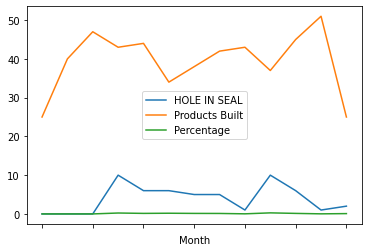

In [91]:
# Plotting HOLE IN SEAL defects by Month
hole_in_seal = df[df['Condition'] == 'HOLE IN SEAL'].groupby('Month').count()['Serial'] # Gives the count of defects per month
Products_month = df.groupby('Month')['Serial'].nunique() # Count of Products per Month
line_chart = pd.DataFrame(columns=['HOLE IN SEAL', 'Products Built', 'Percentage']) # Create dfframe with the mentioned 3 columns 
line_chart['HOLE IN SEAL'] = hole_in_seal # HOLE IN SEAL column
line_chart['Products Built'] = Products_month # Products Built column
line_chart['Percentage'] = line_chart['HOLE IN SEAL'] / line_chart['Products Built'] # Percentage column by diving one column by another
line_chart.plot() # Present plot

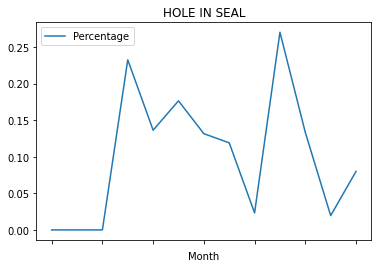

In [92]:
# Plot a line by itself instead
# All code on prior cell required up to last line which becomes this one
line_chart.plot(y='Percentage', title='HOLE IN SEAL')

## Line chart two axes

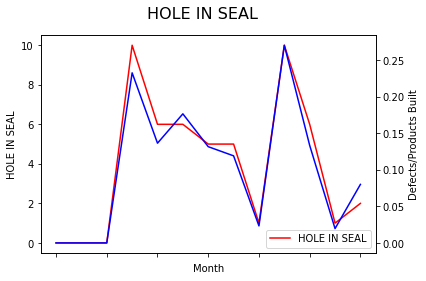

In [93]:
fig = plt.figure()

ax = fig.add_subplot() # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

line_chart['HOLE IN SEAL'].plot(color='red', ax=ax)
line_chart['Percentage'].plot(color='blue', ax=ax2)

ax.set_ylabel('HOLE IN SEAL')
ax.legend(['HOLE IN SEAL'])
ax2.set_ylabel('Defects/Products Built') # Second Axis name
fig.suptitle('HOLE IN SEAL', fontsize=16)
plt.legend().set_visible(False)
plt.show()

## Line chart: Shell and Ballonet Defects

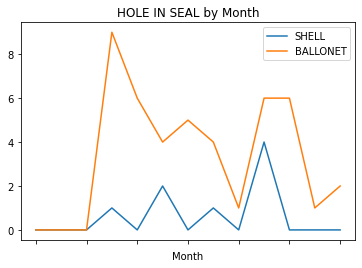

In [95]:
defect = df[df['Condition'] == 'HOLE IN SEAL']

ballonet_defects = defect[defect['Location'].str.startswith('B')] # The defect location starts with a 'B'
shell_defects = defect[~defect['Location'].str.startswith('B')] # The ~ sign negates the previous condition thus returns the opposite


# Plotting Shell and Ballonet HOLE IN SEAL defects by month
shells = shell_defects.groupby('Month').count()['Serial']
ballonets = ballonet_defects.groupby('Month').count()['Serial']

line_chart = pd.DataFrame(columns=['SHELL', 'BALLONET']) # Create dfframe with the mentioned 2 columns 
line_chart['SHELL'] = shells # Shell column
line_chart['BALLONET'] = ballonets # Ballonet column

line_chart.plot(title='HOLE IN SEAL by Month') # Present plot

## Bar chart

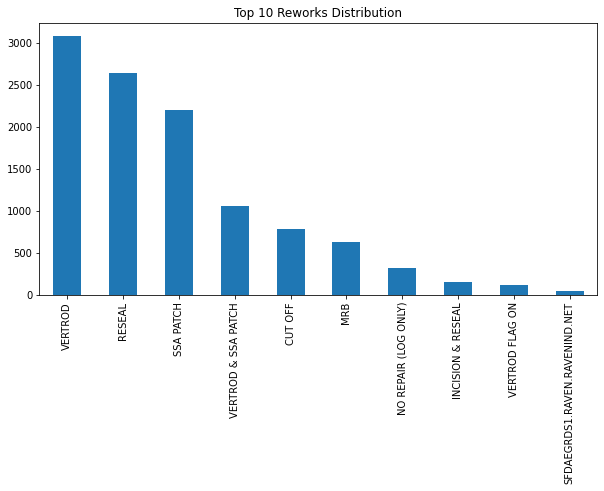

In [96]:
# From all disposition values take the top 10 and create 'bar' chart
# if normalize = True then the percentage not qty will show on left axis
# Other types of charts can be used by changing the kind attribute to 'hbar', 'line', 'hist', 'pie', 'scatter'...
df['Disposition'].value_counts(normalize=False).head(10).plot(figsize=(10,5), kind='bar', title='Top 10 Reworks Distribution')

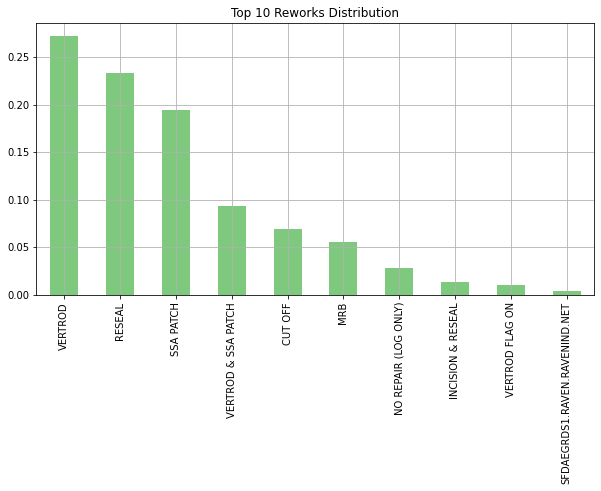

In [97]:
df['Disposition'].value_counts(normalize=True).head(10).plot(figsize=(10,5), colormap='Accent', kind='bar', grid=True, title='Top 10 Reworks Distribution')

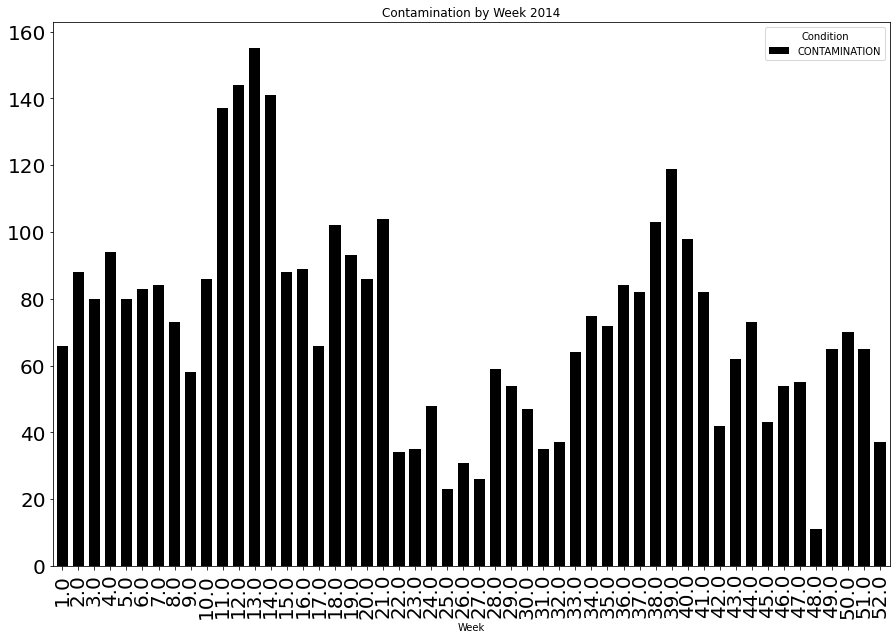

In [98]:
 df[df['Condition'] == "CONTAMINATION"].groupby('Week')['Condition'].value_counts(ascending=True).sort_index().unstack().plot.bar(figsize=(15,10), width=0.7,fontsize=20, color=['black'], title='Contamination by Week 2014')

## Clustered bar chart

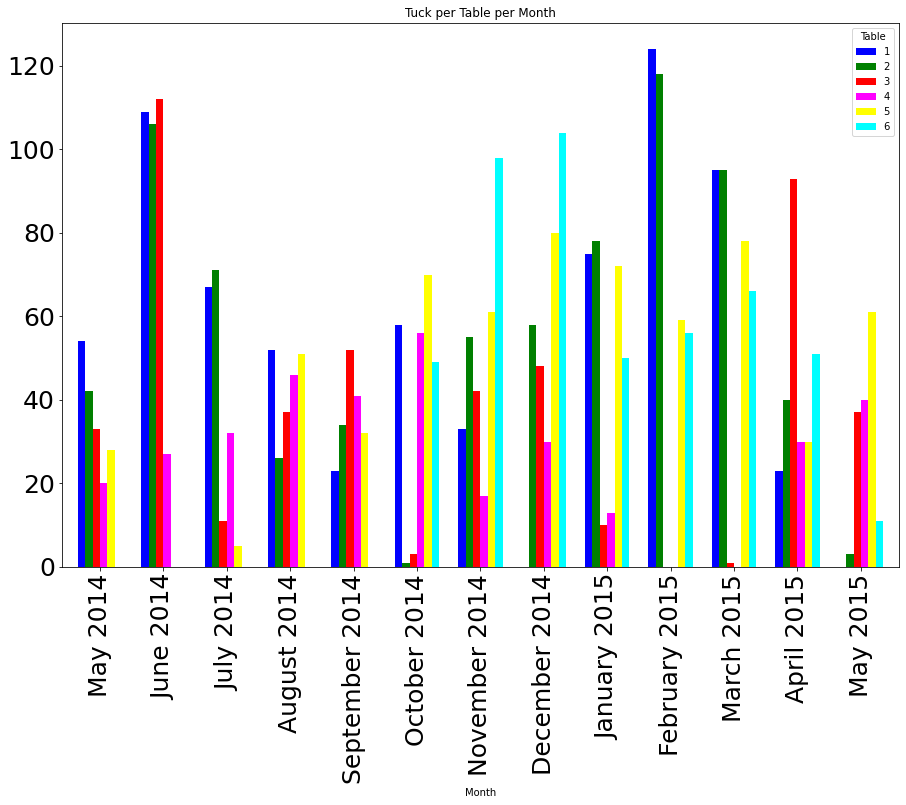

In [99]:
df[df['Condition'] == 'TUCK'][['Month', 'Table']].groupby('Month')['Table'].value_counts().unstack().plot.bar(figsize=(15,10), width=0.7, fontsize=25, color=['blue', 'green', 'red', 'magenta', 'yellow', 'cyan', 'black'], title='Tuck per Table per Month')

If using external charts like gsheets, you can export the df by running same code without the .plot part and just copying the output and pasting it on a spreadsheet.

In [100]:
df[df['Condition'] == 'TUCK'][['Month', 'Table']].groupby('Month')['Table'].value_counts().unstack()

Table,1,2,3,4,5,6
Month,,,,,,
May 2014,54.0,42.0,33.0,20.0,28.0,NaN
June 2014,109.0,106.0,112.0,27.0,NaN,NaN
July 2014,67.0,71.0,11.0,32.0,5.0,NaN
August 2014,52.0,26.0,37.0,46.0,51.0,NaN
September 2014,23.0,34.0,52.0,41.0,32.0,NaN
October 2014,58.0,1.0,3.0,56.0,70.0,49.0
November 2014,33.0,55.0,42.0,17.0,61.0,98.0
December 2014,NaN,58.0,48.0,30.0,80.0,104.0
January 2015,75.0,78.0,10.0,13.0,72.0,50.0


## Pie chart

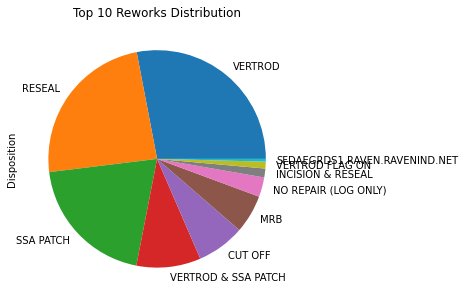

In [101]:
df['Disposition'].value_counts(normalize=False).head(10).plot(figsize=(10,5), kind='pie', title='Top 10 Reworks Distribution')

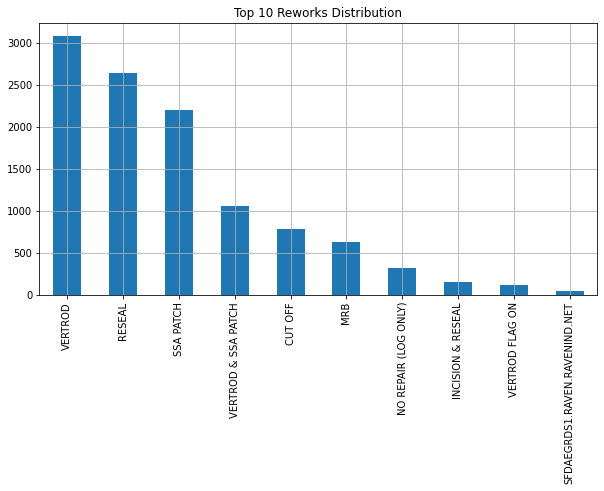

In [102]:
df['Disposition'].value_counts().head(10).plot(figsize=(10,5), kind='bar',
                                                 grid=True, title='Top 10 Reworks Distribution')

## Histogram

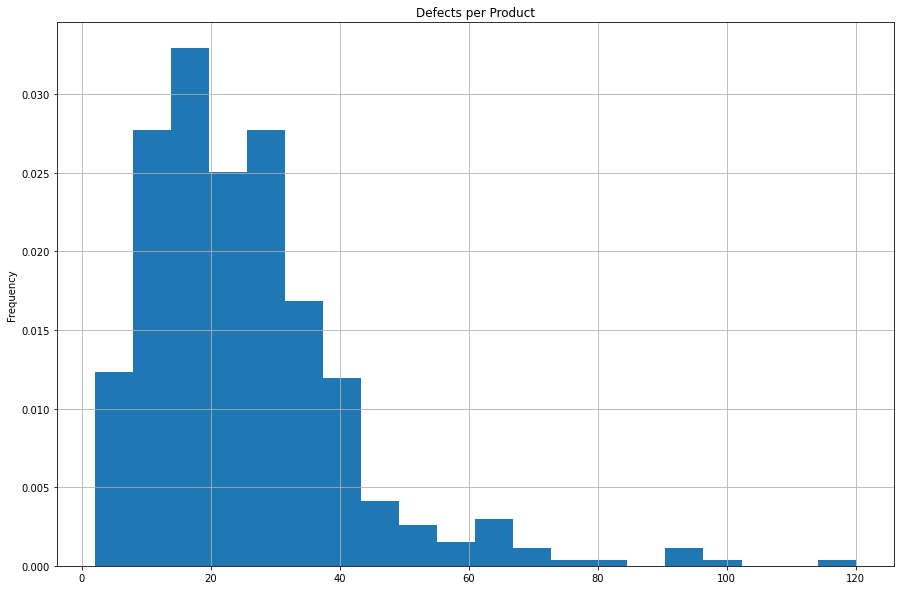

In [103]:
df['Serial'].value_counts().plot.hist(grid=True, title="Defects per Product", figsize=[15,10], cumulative=False, density=1, bins=20, histtype='bar')
plt.show()

# append .to_csv('/content/drive/My Drive/File name.csv') after value_counts for csv df

In [104]:
df[df['Disposition'] == 'INCISION & RESEAL']['Type'].value_counts(normalize=False)

QS    69
QB    39
PS    23
PB    14
Name: Type, dtype: int64

In [105]:
df['Disposition'].value_counts().head(10)

VERTROD                          3081
RESEAL                           2633
SSA PATCH                        2199
VERTROD & SSA PATCH              1052
CUT OFF                           787
MRB                               627
NO REPAIR (LOG ONLY)              320
INCISION & RESEAL                 145
VERTROD FLAG ON                   112
SFDAEGRDS1.RAVEN.RAVENIND.NET      44
Name: Disposition, dtype: int64